# Exercise 5.06: Visualising K-NN Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier as KNN

In [2]:
df = pd.read_csv('../Datasets/breast-cancer-data.csv')
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant


We need to replace the species strings with indices to allow plotting of the prediction boundaries

In [3]:
labelled_diagnoses = [
    'benign',
    'malignant',
]

for idx, label in enumerate(labelled_diagnoses):
    df.diagnosis = df.diagnosis.replace(label, idx)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [4]:
model = KNN(n_neighbors=3)
model.fit(X=df[['mean radius', 'worst radius']], y=df.diagnosis)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

We need to construct the prediction space to allow for the visualisation of class allocations, to do this we will create a matrix or mesh of *mean radius*, *worst radius* coordinates that is slightly greater and less than the corresponding maximum and minimum values for each.  Creating a range of values for *mean radius* and *worst radius* with a spacing of 0.1.

In [5]:
spacing = 0.1
mean_radius_range = np.arange(df['mean radius'].min() - 1, df['mean radius'].max() + 1, spacing)
worst_radius_range = np.arange(df['worst radius'].min() - 1, df['worst radius'].max() + 1, spacing)

Mix the two ranges into a mesh

In [6]:
xx, yy = np.meshgrid(mean_radius_range, worst_radius_range) # Create the mesh
xx

array([[ 5.981,  6.081,  6.181, ..., 28.881, 28.981, 29.081],
       [ 5.981,  6.081,  6.181, ..., 28.881, 28.981, 29.081],
       [ 5.981,  6.081,  6.181, ..., 28.881, 28.981, 29.081],
       ...,
       [ 5.981,  6.081,  6.181, ..., 28.881, 28.981, 29.081],
       [ 5.981,  6.081,  6.181, ..., 28.881, 28.981, 29.081],
       [ 5.981,  6.081,  6.181, ..., 28.881, 28.981, 29.081]])

In [7]:
yy

array([[ 6.93,  6.93,  6.93, ...,  6.93,  6.93,  6.93],
       [ 7.03,  7.03,  7.03, ...,  7.03,  7.03,  7.03],
       [ 7.13,  7.13,  7.13, ...,  7.13,  7.13,  7.13],
       ...,
       [36.83, 36.83, 36.83, ..., 36.83, 36.83, 36.83],
       [36.93, 36.93, 36.93, ..., 36.93, 36.93, 36.93],
       [37.03, 37.03, 37.03, ..., 37.03, 37.03, 37.03]])

In [8]:
pred_x = np.c_[xx.ravel(), yy.ravel()] # Concatenate the results
pred_x

array([[ 5.981,  6.93 ],
       [ 6.081,  6.93 ],
       [ 6.181,  6.93 ],
       ...,
       [28.881, 37.03 ],
       [28.981, 37.03 ],
       [29.081, 37.03 ]])

In [9]:
pred_y = model.predict(pred_x).reshape(xx.shape)
pred_y

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

In [10]:
# Create color maps
cmap_light = ListedColormap(['#6FF6A5', '#F6A56F',])
cmap_bold = ListedColormap(['#0EE664', '#E6640E',])

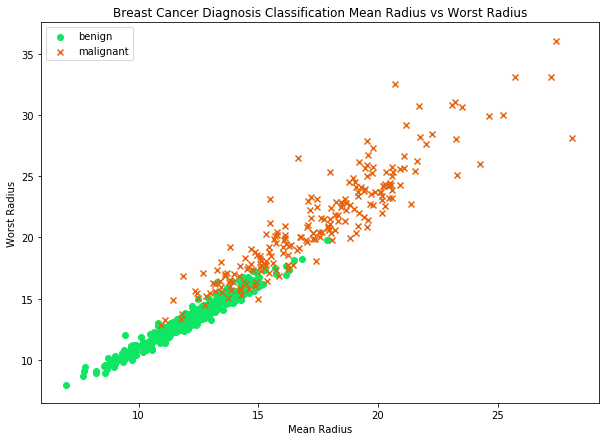

In [11]:
markers = {
    'benign': {'marker': 'o', 'facecolor': 'g', 'edgecolor': 'g'},
    'malignant': {'marker': 'x', 'facecolor': 'r', 'edgecolor': 'r'},
}
plt.figure(figsize=(10, 7))
for name, group in df.groupby('diagnosis'):
    diagnoses = labelled_diagnoses[name]
    plt.scatter(group['mean radius'], group['worst radius'],
                c=cmap_bold.colors[name],
                label=labelled_diagnoses[name],
                marker=markers[diagnoses]['marker']
               )
    
plt.title('Breast Cancer Diagnosis Classification Mean Radius vs Worst Radius');
plt.xlabel('Mean Radius');
plt.ylabel('Worst Radius');
plt.legend();


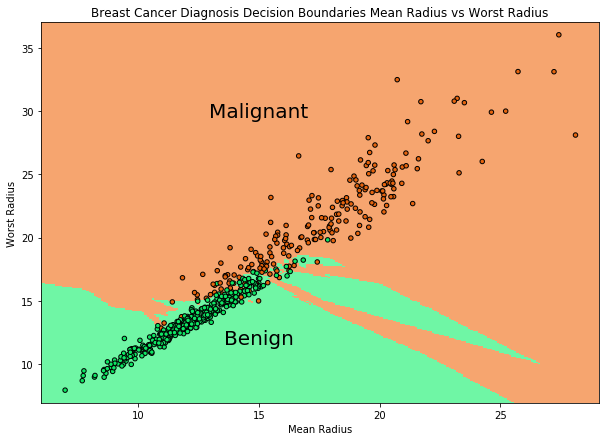

In [12]:
plt.figure(figsize=(10, 7))
plt.pcolormesh(xx, yy, pred_y, cmap=cmap_light);
plt.scatter(df['mean radius'], df['worst radius'], c=df.diagnosis, cmap=cmap_bold, edgecolor='k', s=20);
plt.title('Breast Cancer Diagnosis Decision Boundaries Mean Radius vs Worst Radius');
plt.xlabel('Mean Radius');
plt.ylabel('Worst Radius');
plt.text(15, 12, 'Benign', ha='center',va='center', size=20,color='k');
plt.text(15, 30, 'Malignant', ha='center',va='center', size=20,color='k');